<a href="https://colab.research.google.com/github/Gamebred94/FastAI_V4_P1_course/blob/master/FastAI_V4_L3_MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
#hide
!pip install -Uqq fastbook --upgrade

     |████████████████████████████████| 727kB 29.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 194kB 42.3MB/s 
     |████████████████████████████████| 1.2MB 49.7MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *
import joblib
matplotlib.rc('image', cmap='Greys')

root_dir = "gdrive/MyDrive/"
base_dir = root_dir + "fastai-v4/"
dest = base_dir + "lesson3-MNIST"


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE,dest=dest)
%cd 'gdrive/My Drive/fastai-v4/lesson3-MNIST/'

In [ ]:
path

Path('gdrive/MyDrive/fastai-v4/lesson3-MNIST/mnist_sample')

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens =(path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [ ]:
tensor(Image.open(sevens[0])).shape

torch.Size([28, 28])

In [ ]:
type(im3)

PIL.PngImagePlugin.PngImageFile

In [ ]:
array(im3) # representation of 3 as numbers

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [ ]:
# Slicing the top left corner of the image
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [ ]:
# same thing as a pytorch tensor
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

Slicing the array to pick just the part with the top of the digit in it, and then use a Pandas DataFrame to color-code the values using a gradient,
which shows us clearly how the image is created and rendered by PIL from the pixel values:

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size' : '10pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


- Pixels range from 0(white) to 255(black)
- The background white pixels are stored as the number 0, black is the number 255, and shades of gray are between the two. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels.)

In [ ]:
(tensor(im3)).shape

torch.Size([28, 28])

In [ ]:
tensor(im3)[4:10,4:10].shape

torch.Size([6, 6])

Create a model that can recognize 3s and 7s via Pixel Similarity

- first step is to get the average of the groups of 3's and 7's.

In [ ]:
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [ ]:
#seven_tensors = [tensor(Image.open(o)) for o in sevens] - processed and saved
#seven_tensors

In [ ]:
# three_tensors = [tensor(Image.open(o)) for o in threes]
# three_tensors

In [ ]:
len(sevens),len(threes)

(6265, 6131)

In [ ]:
#joblib.dump(seven_tensors,'seven_tensors.pkl')  # one time processing
#joblib.dump(three_tensors,'three_tensors.pkl')

In [ ]:
%pwd

'/content/gdrive/My Drive/fastai-v4/lesson3-MNIST'

In [ ]:
three_tensors = joblib.load('three_tensors.pkl')
seven_tensors = joblib.load('seven_tensors.pkl')
three_tensors[0:1],seven_tensors[0:1]

([tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 25

(<matplotlib.axes._subplots.AxesSubplot at 0x7f86fa859250>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f86fa446d90>)

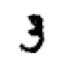

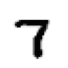

In [ ]:
show_image(three_tensors[0]),show_image(seven_tensors[0])

In [ ]:
# converting lists to tensors and stacking them into a 3d tensor for performing arithmetic operations easily

stacked_sevens = torch.stack(seven_tensors).float()/255 # converting to floats because we don't want int values of the pixels to round off when performing a mean
# 0-255 is the range of pixel values, a std is to scale float values between 0 and 1 in CV. Generally when images are floats, the pixel values are expected to be between 0 and 1, so we will also divide by 255 here.
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape # rank three tensor-3 axis

torch.Size([6131, 28, 28])

In [ ]:
len(stacked_threes.shape),stacked_threes.ndim # rank of tensor

#There is nothing specifically about this tensor that says that the first axis is the number of images,
#the second is the height, and the third is the width—the semantics of a tensor are entirely up to us, and how we construct it.

(3, 3)

sometimes dimension is used for the size of an axis ("space is three-dimensional"); other times, it is used for the rank, or the number of axes ("a matrix has two dimensions").It's helpful to translate all statements into terms of rank, axis, and length, which are unambiguous terms.

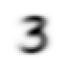

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

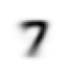

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

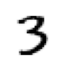

In [ ]:
a_3 = stacked_threes[1]
show_image(a_3)

Taking an absolute/squared difference, since differences will cancel out, resulting in a situation where an image that is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

In [ ]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [ ]:
F.l1_loss(a_3,mean7),F.mse_loss(a_3,mean7).sqrt() # same thing using pytorch

(tensor(0.1586), tensor(0.3021))

## Working with arrays and tensors

A NumPy array is a multidimensional table of data, with all items of the same type. Since that can be any type at all, they can even be arrays of arrays, with the innermost arrays potentially being different sizes—this is called a "jagged array." By "multidimensional table" we mean, for instance, a list (dimension of one), a table or matrix (dimension of two), a "table of tables" or "cube" (dimension of three), and so forth. If the items are all of some simple type such as integer or float, then NumPy will store them as a compact C data structure in memory. This is where NumPy shines. NumPy has a wide variety of operators and methods that can run computations on these compact structures at the same speed as optimized C, because they are written in optimized C.

A PyTorch tensor is nearly the same thing as a NumPy array, but with an additional restriction that unlocks some additional capabilities. It's the same in that it, too, is a multidimensional table of data, with all items of the same type. However, the restriction is that a tensor cannot use just any old type—it has to use a single basic numeric type for all components. For example, a PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.

The vast majority of methods and operators supported by NumPy on these structures are also supported by PyTorch, but PyTorch tensors have additional capabilities. One major capability is that these structures can live on the GPU, in which case their computation will be optimized for the GPU and can run much faster (given lots of values to work on). In addition, PyTorch can automatically calculate derivatives of these operations, including combinations of operations. As you'll see, it would be impossible to do deep learning in practice without this capability.

In [ ]:

data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns[1],arr[1]

(tensor([4, 5, 6]), array([4, 5, 6]))

In [ ]:
tns[:,1]

tensor([2, 5])

In [ ]:
tns[1,1:3]

tensor([5, 6])

In [ ]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [ ]:
type(tns),tns.type() # type of tensor

(torch.Tensor, 'torch.LongTensor')

In [ ]:
tns*2

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [ ]:
tns*1.5 # get floats

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [ ]:
tns/2

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])

In [ ]:
# validation set for 3's and 7's

# valid_3_tens = torch.stack([tensor(Image.open(o))
#                              for o in (path/'valid'/'3').ls()])
# valid_3_tens = valid_3_tens.float()/255

# valid_7_tens = torch.stack([tensor(Image.open(o))
#                             for o in (path/'valid'/'7').ls()])
# valid_7_tens = valid_7_tens.float()/255

# joblib.dump(valid_3_tens,'valid_3_tens.pkl')
# joblib.dump(valid_7_tens,'valid_7_tens.pkl')

#########-One time operation-#############
valid_3_tens = joblib.load('valid_3_tens.pkl')
valid_7_tens = joblib.load("valid_7_tens.pkl")

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
(path/'valid'/'7').ls()

(#1028) [Path('valid/7/5751.png'),Path('valid/7/1520.png'),Path('valid/7/1754.png'),Path('valid/7/2104.png'),Path('valid/7/2482.png'),Path('valid/7/771.png'),Path('valid/7/7460.png'),Path('valid/7/262.png'),Path('valid/7/2671.png'),Path('valid/7/3294.png')...]

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [ ]:
a_3.shape,mean3.shape,valid_3_tens.shape,mean3.shape

(torch.Size([28, 28]),
 torch.Size([28, 28]),
 torch.Size([1010, 28, 28]),
 torch.Size([28, 28]))

 PyTorch, when it tries to perform a simple subtraction operation between two tensors of different ranks, will use broadcasting. That is, it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

After broadcasting so the two argument tensors have the same rank, PyTorch applies its usual logic for two tensors of the same rank: it performs the operation on each corresponding element of the two tensors, and returns the tensor result.
In this case, PyTorch treats mean3, a rank-2 tensor representing a single image, as if it were 1,010 copies of the same image, and then subtracts each of those copies from each 3 in our validation set.

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens,mean3)  # automatically uses broadcasting
valid_3_dist,valid_3_dist.shape

(tensor([0.1272, 0.1080, 0.1209,  ..., 0.1422, 0.1578, 0.1387]),
 torch.Size([1010]))

In [ ]:
(valid_3_tens-mean3).shape, tensor([1,2,3]) + tensor(1)

(torch.Size([1010, 28, 28]), tensor([2, 3, 4]))


PyTorch doesn't actually copy mean3 1,010 times. It pretends it were a tensor of that shape, but doesn't actually allocate any additional memory
It does the whole calculation in C (or, if you're using a GPU, in CUDA, the equivalent of C on the GPU), tens of thousands of times faster than pure Python (up to millions of times faster on a GPU!).
This is true of all broadcasting and elementwise operations and functions done in PyTorch. It's the most important technique for you to know to create efficient PyTorch code.

Finally, our function calls mean((-1,-2)). The tuple (-1,-2) represents a range of axes. In Python, -1 refers to the last element, and -2 refers to the second-to-last. So in this case, this tells PyTorch that we want to take the mean ranging over the values indexed by the last two axes of the tensor. The last two axes are the horizontal and vertical dimensions of an image. After taking the mean over the last two axes, we are left with just the first tensor axis, which indexes over our images, which is why our final size was (1010). In other words, for every image, we averaged the intensity of all the pixels in that image.

In [ ]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [ ]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [ ]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - (is_3(valid_7_tens).float().mean())

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

#Gradient descent Implementation-1

Taking gradients in pytorch. Assuming below function 'f' to be our loss func with a randomly initialised input param as 'x'.

In [ ]:
def f(x): return (x**2)

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


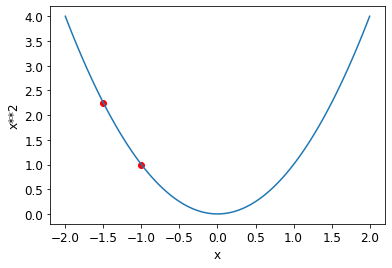

In [ ]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red') # moving x along the gradient & looking at the slope- Newton's method
plt.scatter(-1.0, f(-1.0), color='red')


In [ ]:
xt = tensor(3.).requires_grad_() # _ in the end resembles inplace operation
xt,xt.grad # gradient = derivative = slope, derivative is not taken thus gradient is 0

(tensor(3., requires_grad=True), None)

In [ ]:
yt = f(xt)
yt # grad_fn is storing & identifying the operations being done on xt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward() # performing backpropagation i.e taking the derivative
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
xt.grad # since derivative of 3**2 = 2*3 = 6

tensor(6.)

In [ ]:
xt = tensor([3.,4.,10.]).requires_grad_()  # vector calculus
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x): return(x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor([ 6.,  8., 20.])

gradient is the rate of change eg. 3 is the slope, now on tweaking the parameters by +- 3 we can calculate our loss.

learning rate is usually b/w 0.001 & 0.1
Once you've picked a learning rate, you can adjust your parameters using this simple function:

```
w -= gradient(w) * lr
```

This is known as *stepping* your parameters, using an *optimizer step*.

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

# Gradient descent implementation - 2

Implementing GD for predicting speed of a rollercoaster at each time interval
by assuming a quadratic function as our hypothesis function which maps time to speed.

In [ ]:
time = torch.arange(0,20).float()
time,time.size()

(tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.]),
 torch.Size([20]))

* Adding random noise since measuring speed manually isn't precise. Using GD we can try to find a function that matches our observations.
* We can't consider every possible function, so let's use a guess that it will be quadratic; i.e., a function of the form a*(time**2)+(b*time)+c where time is our x and speed is our y.

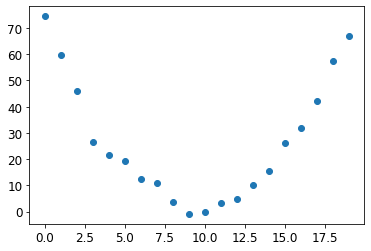

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1 # adding noise using randn and representing the quadratic func(with 0.75 & 9.5 as randomly initialised params) using vertex form
plt.scatter(time,speed);

* We want to distinguish clearly between the function's input (the time when we are measuring the coaster's speed) and its parameters (the values that define which quadratic we're trying). So, let's collect the parameters in one argument and thus separate the input, t, and the parameters, params, in the function's signature.
* In other words, we've restricted the problem of finding the best imaginable function that fits the data, to finding the best quadratic function. This greatly simplifies the problem, since every quadratic function is fully defined by just the three parameters a, b, and c. Thus, to find the best quadratic function, we only need to find the best values for a, b, and c.
* If we can solve this problem for the three parameters of a quadratic function, we'll be able to apply the same approach for other, more complex functions with more parameters—such as a neural net.

In [ ]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c # HYPOTHESIS func which returns speed(y).

# loss func

def mse(preds, targets): return ((preds-targets)**2).mean()

7 step process by Arthur Samuel to find the best weights(parameters) for a,b,c to optimise our quadratic func.

In [ ]:
# step 1 - randomly initialise the weights for our parameters and preserve their gradients
params = torch.randn(3).requires_grad_()
params

tensor([0.2815, 0.0562, 0.5227], requires_grad=True)

In [ ]:
orig_params = params.clone()
orig_params

tensor([0.2815, 0.0562, 0.5227], grad_fn=<CloneBackward>)

In [ ]:
# step 2 - calculate the predictions
preds = f(time,params)
preds,len(preds)

(tensor([  0.5227,   0.8604,   1.7611,   3.2249,   5.2517,   7.8415,  10.9944,  14.7103,  18.9893,  23.8313,  29.2363,  35.2044,  41.7355,  48.8296,  56.4868,  64.7071,  73.4903,  82.8366,  92.7460,
         103.2184], grad_fn=<AddBackward0>), 20)

In [ ]:
# viz preds vs actuals
def show_preds(preds, ax=None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

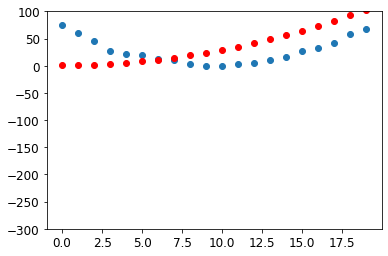

In [ ]:
show_preds(preds)

In [ ]:
# step 3- calculate the loss

loss = mse(preds,speed)
loss

tensor(1325.5891, grad_fn=<MeanBackward0>)

In [ ]:
# step 4- calcualte gradients- in other words an approaximation of how the parameters need to change/slope
loss.backward()
params.grad

tensor([8442.9541,  544.7577,   18.4759])

In [ ]:
params.grad * 1e-5 # 1e equivalent to 10 & thus 1e-5 =  10**-5 or 0.00001


tensor([0.2990, 0.0192, 0.0011])

In [ ]:
params

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

In [ ]:
# step 5 - step the weights i.e to update the parameters based on the gradients we calculated:
lr = 1e-5
params.data -= lr*params.grad.data # .data is used to tell pytorch to ignore the gradients for this step/ignore calculation at this step for taking gradients.

In [ ]:
params.grad = None # deleting the gradients once the stepping has been done

To calculate the gradients we call backward on the loss. But this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called required_grads_—which is the original call that now allows us to call backward on loss. This chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.

In [ ]:
params

tensor([ 0.3873, -0.3469,  0.7939], requires_grad=True)

In [ ]:
preds = f(time,params)
mse(preds,speed)

tensor(2190.2759, grad_fn=<MeanBackward0>)

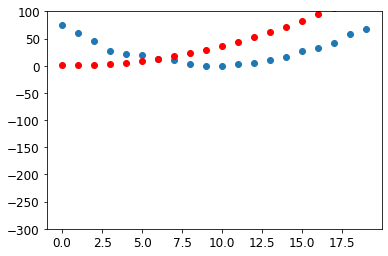

In [ ]:
show_preds(preds)

In [ ]:
loss.item(),loss

(8631.7373046875, tensor(8631.7373, grad_fn=<MeanBackward0>))

In [ ]:
#step 6- repeat the process for epochs

In [ ]:
def apply_step(params,prn=True):
  preds = f(time,params)
  loss = mse(preds,speed)
  loss.backward() # calculates gradient
  params.data -= lr*params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds


In [ ]:
for i in range(20): apply_step(params) # loss is going down  slowly because of very small lr

686.7850341796875
686.7811279296875
686.7770385742188
686.7730712890625
686.7692260742188
686.7652587890625
686.7614135742188
686.7574462890625
686.7535400390625
686.7496337890625
686.7457275390625
686.7417602539062
686.7378540039062
686.7340087890625
686.72998046875
686.7261962890625
686.72216796875
686.71826171875
686.7142944335938
686.7103881835938


In [ ]:
params

tensor([ 0.1570, -0.3607,  0.8007], requires_grad=True)

In [ ]:
params = orig_params.detach().requires_grad_() # Repeating same process via viz. detach returns new tensor removed from current graph

In [ ]:
params

tensor([ 0.6863, -0.3278,  0.7950], requires_grad=True)

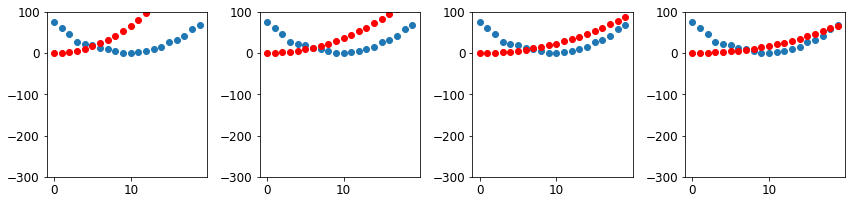

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params,False),ax)
plt.tight_layout()

In [ ]:
# STEP 7- IS TO STOP AFTER A POINT/ EPOCHS/ITERATIONS